# Data Visualization and Statistics for the UJI Probe Dataset

This package contains an anonymized packets of 802.11 probe requests captured throughout March of 2023 at Universitat Jaume I. The packet capture file is in the standardized *.pcap binary format and can be opened with any packet analysis tool such as Wireshark or scapy (Python packet analysis and manipulation package).

The dataset is usable for analyzis of Wi-Fi probe requests, presence detection, occupancy estimation or signal stability analyzis.

[Download](https://zenodo.org/records/7801798)

## Libraries and Configurations

Import configuration files

In [152]:
from configparser import ConfigParser

config = ConfigParser()
config.read("../config.ini")

['../config.ini']

Import **data libraries**

In [153]:
import pandas as pd

Import **other libraries**

In [154]:
from rich.progress import Progress
from rich import traceback

traceback.install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x106722490>>

Custom helper scripts

In [155]:
%cd ..
from scripts import plotHelper, encodingHelper
%cd data_exploration_cleaning

/Users/bacci/Library/CloudStorage/SynologyDrive-giovanni/Research 🌱/Repositories/COMPACT/notebooks
/Users/bacci/Library/CloudStorage/SynologyDrive-giovanni/Research 🌱/Repositories/COMPACT/notebooks/data_exploration_cleaning


## Import Data

In [156]:
# Combined dataframe
uji_df_csv = config["UJI"]["extracted_path"] + "/uji_probes.csv"

In [157]:
uji_df = pd.read_csv(uji_df_csv)
uji_df["Timestamp"] = pd.to_datetime(uji_df["Timestamp"], unit="s")

Since the dataset is not labelled, we can drop the `Label` column

In [158]:
uji_df.drop(columns=["Label"], inplace=True)

Filling empty fields with `-1`

In [159]:
uji_df.fillna(-1, inplace=True)

## Statistics

In [160]:
print("Number of unique MAC Addresses", uji_df["MAC Address"].nunique())

Number of unique MAC Addresses 129330


### Information Elements

In [161]:
print("Number of unique HT Capabilities", uji_df["HT Capabilities"].nunique())

Number of unique HT Capabilities 209


In [162]:
print("Number of unique VHT Capabilities", uji_df["VHT Capabilities"].nunique())

Number of unique VHT Capabilities 55


In [163]:
print("Number of unique HE Capabilities", uji_df["HE Capabilities"].nunique())

Number of unique HE Capabilities 162


In [164]:
print("Number of unique Supported Rates", uji_df["Supported Rates"].nunique())

Number of unique Supported Rates 23


In [165]:
print(
    "Number of unique Extended Supported Rates",
    uji_df["Extended Supported Rates"].nunique(),
)

Number of unique Extended Supported Rates 13


## SSID Field

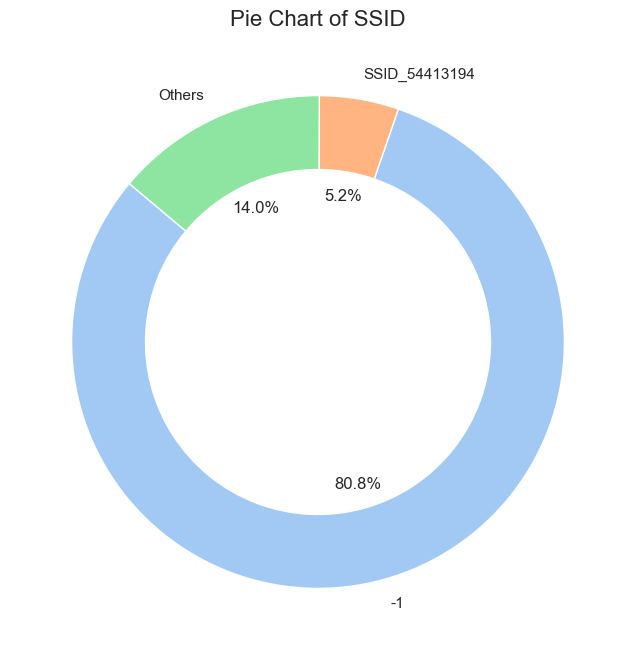

In [166]:
plotHelper.plot_pie_chart(uji_df, "SSID")

Since the `SSID` field is empty most of the time, we drop the column

In [167]:
uji_df.drop(columns=["SSID"], inplace=True)

In [168]:
uji_df

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length
0,2023-02-28 10:06:13.608247995,16:d2:8e:2a:d5:47,6,5.0,2d4017ff00000000000000000000000000000000000000...,0000080400000040,0017f20a00010400000000,02040b16,0c1218243048606c,-1,-1,145
1,2023-02-28 10:06:13.619611979,16:d2:8e:2a:d5:47,6,5.0,2d4017ff00000000000000000000000000000000000000...,0000080400000040,0017f20a00010400000000,02040b16,0c1218243048606c,-1,-1,145
2,2023-02-28 10:06:15.874474049,aa:a2:d1:e3:8c:22,6,6.0,2d4017ff00000000000000000000000000000000000000...,0000080400000040,0017f20a00010400000000,02040b16,0c1218243048606c,-1,-1,145
3,2023-02-28 10:06:17.232656956,86:6f:da:1b:96:4b,9,8.0,2d0917ff00000000000000000000000000000000000000...,050008800000004080,0050f208001200,02040b160c121824,3048606c,-1,-1,107
4,2023-02-28 10:06:17.326913118,60:83:34:df:f8:74,10,9.0,2c0103ff00000000000000000000000000000000000000...,-1,0050f208000000,02040b16,0c1218243048606c,-1,-1,109
...,...,...,...,...,...,...,...,...,...,...,...,...
1410829,2023-03-29 10:36:00.696099997,c6:6f:dd:56:6d:7e,11,10.0,ef0113ffff000000000000000000000000000000000000...,00000a8200400000000120,0050f208002800,02040b16,0c1218243048606c,92f19033faff6203faff6203,020028,163
1410830,2023-03-29 10:36:00.717555046,c6:6f:dd:56:6d:7e,11,10.0,ef0113ffff000000000000000000000000000000000000...,00000a8200400000000120,0050f208002800,02040b16,0c1218243048606c,92f19033faff6203faff6203,020014,150
1410831,2023-03-29 10:36:00.722501040,c6:6f:dd:56:6d:7e,11,10.0,ef0113ffff000000000000000000000000000000000000...,00000a8200400000000120,0050f208002800,02040b16,0c1218243048606c,92f19033faff6203faff6203,020013,163
1410832,2023-03-29 10:36:03.044989109,ce:1c:b2:ac:5c:9c,2,1.0,ad0917ffff000000000000000000000000000000000000...,04000a8201400040802120,0050f208002a00,02040b16,0c1218243048606c,92f99133faff0c03faff0c03,2303010082400004334c890d0180c8000c00fafffaff19...,168


In [169]:
dataset_probes_total = uji_df.shape[0]

Dropping rows having a locally administered `MAC Address`: the 2nd digit of locally assigned MAC address in hexadecimal format has only four options: **2** (0010), **6** (0110), **A** (1010) or **E** (1110).

In [170]:
uji_df = uji_df.loc[~uji_df["MAC Address"].str[1].isin(["2", "6", "a", "e"]), :]

In [171]:
uji_df

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length
4,2023-02-28 10:06:17.326913118,60:83:34:df:f8:74,10,9.0,2c0103ff00000000000000000000000000000000000000...,-1,0050f208000000,02040b16,0c1218243048606c,-1,-1,109
5,2023-02-28 10:06:17.327796936,60:83:34:df:f8:74,10,9.0,2c0103ff00000000000000000000000000000000000000...,-1,0050f208000000,02040b16,0c1218243048606c,-1,-1,96
6,2023-02-28 10:06:17.336941957,60:83:34:df:f8:74,10,9.0,2c0103ff00000000000000000000000000000000000000...,-1,0050f208000000,02040b16,0c1218243048606c,-1,-1,109
7,2023-02-28 10:06:25.303733110,48:5f:99:07:10:21,2,-1.0,ef1902ffff000000000000000000000000000000000000...,000000000000000000,-1,82848b960c121824,3048606c,-1,-1,102
8,2023-02-28 10:06:25.305162907,48:5f:99:07:10:21,2,-1.0,ef1902ffff000000000000000000000000000000000000...,000000000000000000,-1,82848b960c121824,3048606c,-1,-1,102
...,...,...,...,...,...,...,...,...,...,...,...,...
1410798,2023-03-29 10:35:45.241776943,28:39:26:b4:51:55,11,-1.0,ad09020000000000000000000000000000000000000000...,000008000000000000,-1,82848b960c121824,3048606c,-1,-1,102
1410799,2023-03-29 10:35:45.242811918,28:39:26:b4:51:55,11,-1.0,ad09020000000000000000000000000000000000000000...,000008000000000000,-1,82848b960c121824,3048606c,-1,-1,102
1410800,2023-03-29 10:35:45.248949051,28:39:26:b4:51:55,11,-1.0,ad09020000000000000000000000000000000000000000...,000008000000000000,-1,82848b960c121824,3048606c,-1,-1,102
1410801,2023-03-29 10:35:45.250413895,28:39:26:b4:51:55,11,-1.0,ad09020000000000000000000000000000000000000000...,000008000000000000,-1,82848b960c121824,3048606c,-1,-1,102


In [172]:
dataset_probes_non_random = uji_df.shape[0]

In [173]:
print(
    "Percentage of non-random MAC Addresses",
    (dataset_probes_non_random / dataset_probes_total) * 100,
    "%",
)

Percentage of non-random MAC Addresses 65.07172353373963 %


In [174]:
print("Number of unique NON randomized MAC Addresses", uji_df["MAC Address"].nunique())

Number of unique NON randomized MAC Addresses 2437


In [175]:
print(
    "Average number of probes per unique MAC Address",
    uji_df.groupby("MAC Address").size().mean(),
)

Average number of probes per unique MAC Address 376.7148132950349


## Label Encoding

In [176]:
# Iterate over each column in the dataframe
for column in uji_df.columns:
    # Check if the column is of object type
    if uji_df[column].dtype == "object":
        # Convert the column to string type
        uji_df[column] = uji_df[column].astype(str)
        # Label encode the column
        uji_df[column] = label_encoder.fit_transform(uji_df[column])

/var/folders/kz/mqbx964j4w53vxgzd7rlzx380000gn/T/ipykernel_18113/2164050177.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uji_df[column] = uji_df[column].astype(str)
/var/folders/kz/mqbx964j4w53vxgzd7rlzx380000gn/T/ipykernel_18113/2164050177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uji_df[column] = label_encoder.fit_transform(uji_df[column])
/var/folders/kz/mqbx964j4w53vxgzd7rlzx380000gn/T/ipykernel_18113/2164050177.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [177]:
to_drop = ["Timestamp", "MAC Address"]

In [178]:
uji_df.drop(columns=to_drop, inplace=True)

/var/folders/kz/mqbx964j4w53vxgzd7rlzx380000gn/T/ipykernel_18113/3893458755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uji_df.drop(columns=to_drop, inplace=True)


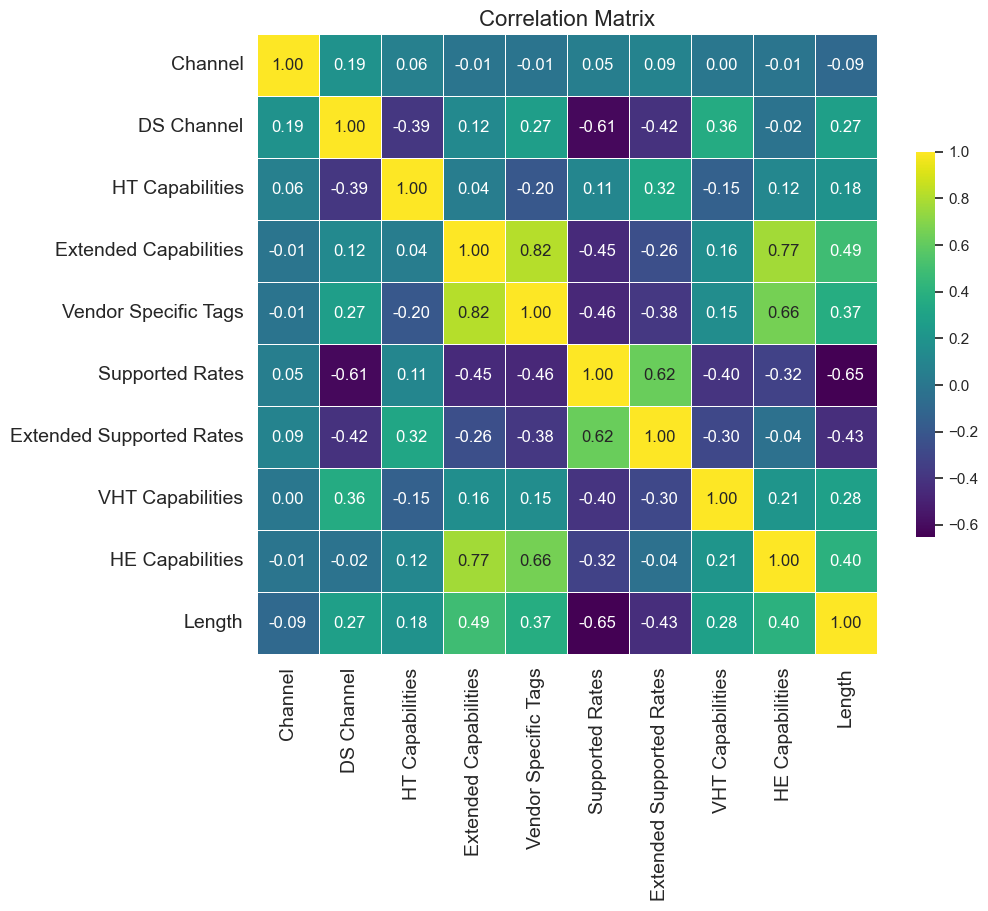

In [179]:
plotHelper.plot_correlation_matrix(uji_df)